In [1]:
import pandas as pd
import numpy as np

from sankeyflow import Sankey
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
pre_sem = pd.read_csv('c://Users/wadeb/Downloads/pre_semester_survey - Sheet1 (4).csv')
post_sem = pd.read_csv('c://Users/wadeb/Downloads/post_semester_survey - Sheet1.tsv', delimiter='\t')
metadata = pd.read_csv('c://Users/wadeb/Downloads/student_metadata - identified.tsv', delimiter='\t')
data=pd.read_csv(r"c:\Users\wadeb\Downloads\postSem_encoded (1).tsv", sep='\t')
alumni_survey=pd.read_csv(r"c:\Users\wadeb\Downloads\alumni_survey - Alumni.tsv", sep='\t')
recommendation_results = pd.read_csv(r'c:\Users\wadeb\Downloads\recommendation_responses - Sheet1.tsv', sep='\t')

In [3]:
metadata.loc[:, 'SemID'] = metadata.loc[:, 'Semester'].str[:2] + metadata.loc[:, 'Year'].astype(str).str[2:4]
student_sem_key = metadata.loc[:, 'SemID']
student_sem_key.index = metadata.loc[:, 'ID']

pre_sem = pre_sem.loc[pre_sem.ID.str[0] == 'S', ]
pre_sem_numbers = student_sem_key.loc[pre_sem.ID].value_counts()

post_sem = post_sem.loc[~post_sem.ID.isna(), :]
post_sem.loc[:, 'SemID'] = post_sem.loc[:, 'Semester'].str[:2] + post_sem.loc[:, 'Year'].astype(str).str[2:4]
post_sem_numbers = post_sem.SemID.value_counts()

whole_counts = metadata.loc[:, 'Semester'].str[:2] + metadata.loc[:, 'Year'].astype(str).str[-2:]
whole_counts=whole_counts.value_counts().loc[['Fa24','Sp24', 'Fa23', 'Sp23', 'Fa22', 'Sp22', 'Fa21', 'Sp21']]

sem_nodes = list(zip(whole_counts.index, whole_counts.values))
flows=[]
yes_total=0
for year, total in sem_nodes:
    if year in pre_sem_numbers.index:
        first_survey = pre_sem_numbers[year]

        flows.append([year, 'Yes', first_survey, {'flow_color_mode': 'source'}])
        yes_total+=(first_survey)
        if total > first_survey:
            flows.append([year, 'No', total-first_survey, {'flow_color_mode': 'source'}])
    else:
        flows.append([year, 'No', total, {'flow_color_mode': 'source'}])

flows.append(['Yes', '⠀Yes', post_sem_numbers.sum(), {'flow_color_mode': 'source'}])
flows.append(['Yes', '⠀No', yes_total-post_sem_numbers.sum(), {'flow_color_mode': 'source'}])
flows.append(['No', '⠀Yes', 0])
flows.append(['No', '⠀No', whole_counts.sum()-yes_total.sum(), {'flow_color_mode': 'source'}])

In [4]:
sizes = alumni_survey.iloc[:13, 3].value_counts().to_numpy()
def absolute_value(val):
    a  = np.round(val/100.*np.sum(sizes), 0)
    a = int(a)
    return a

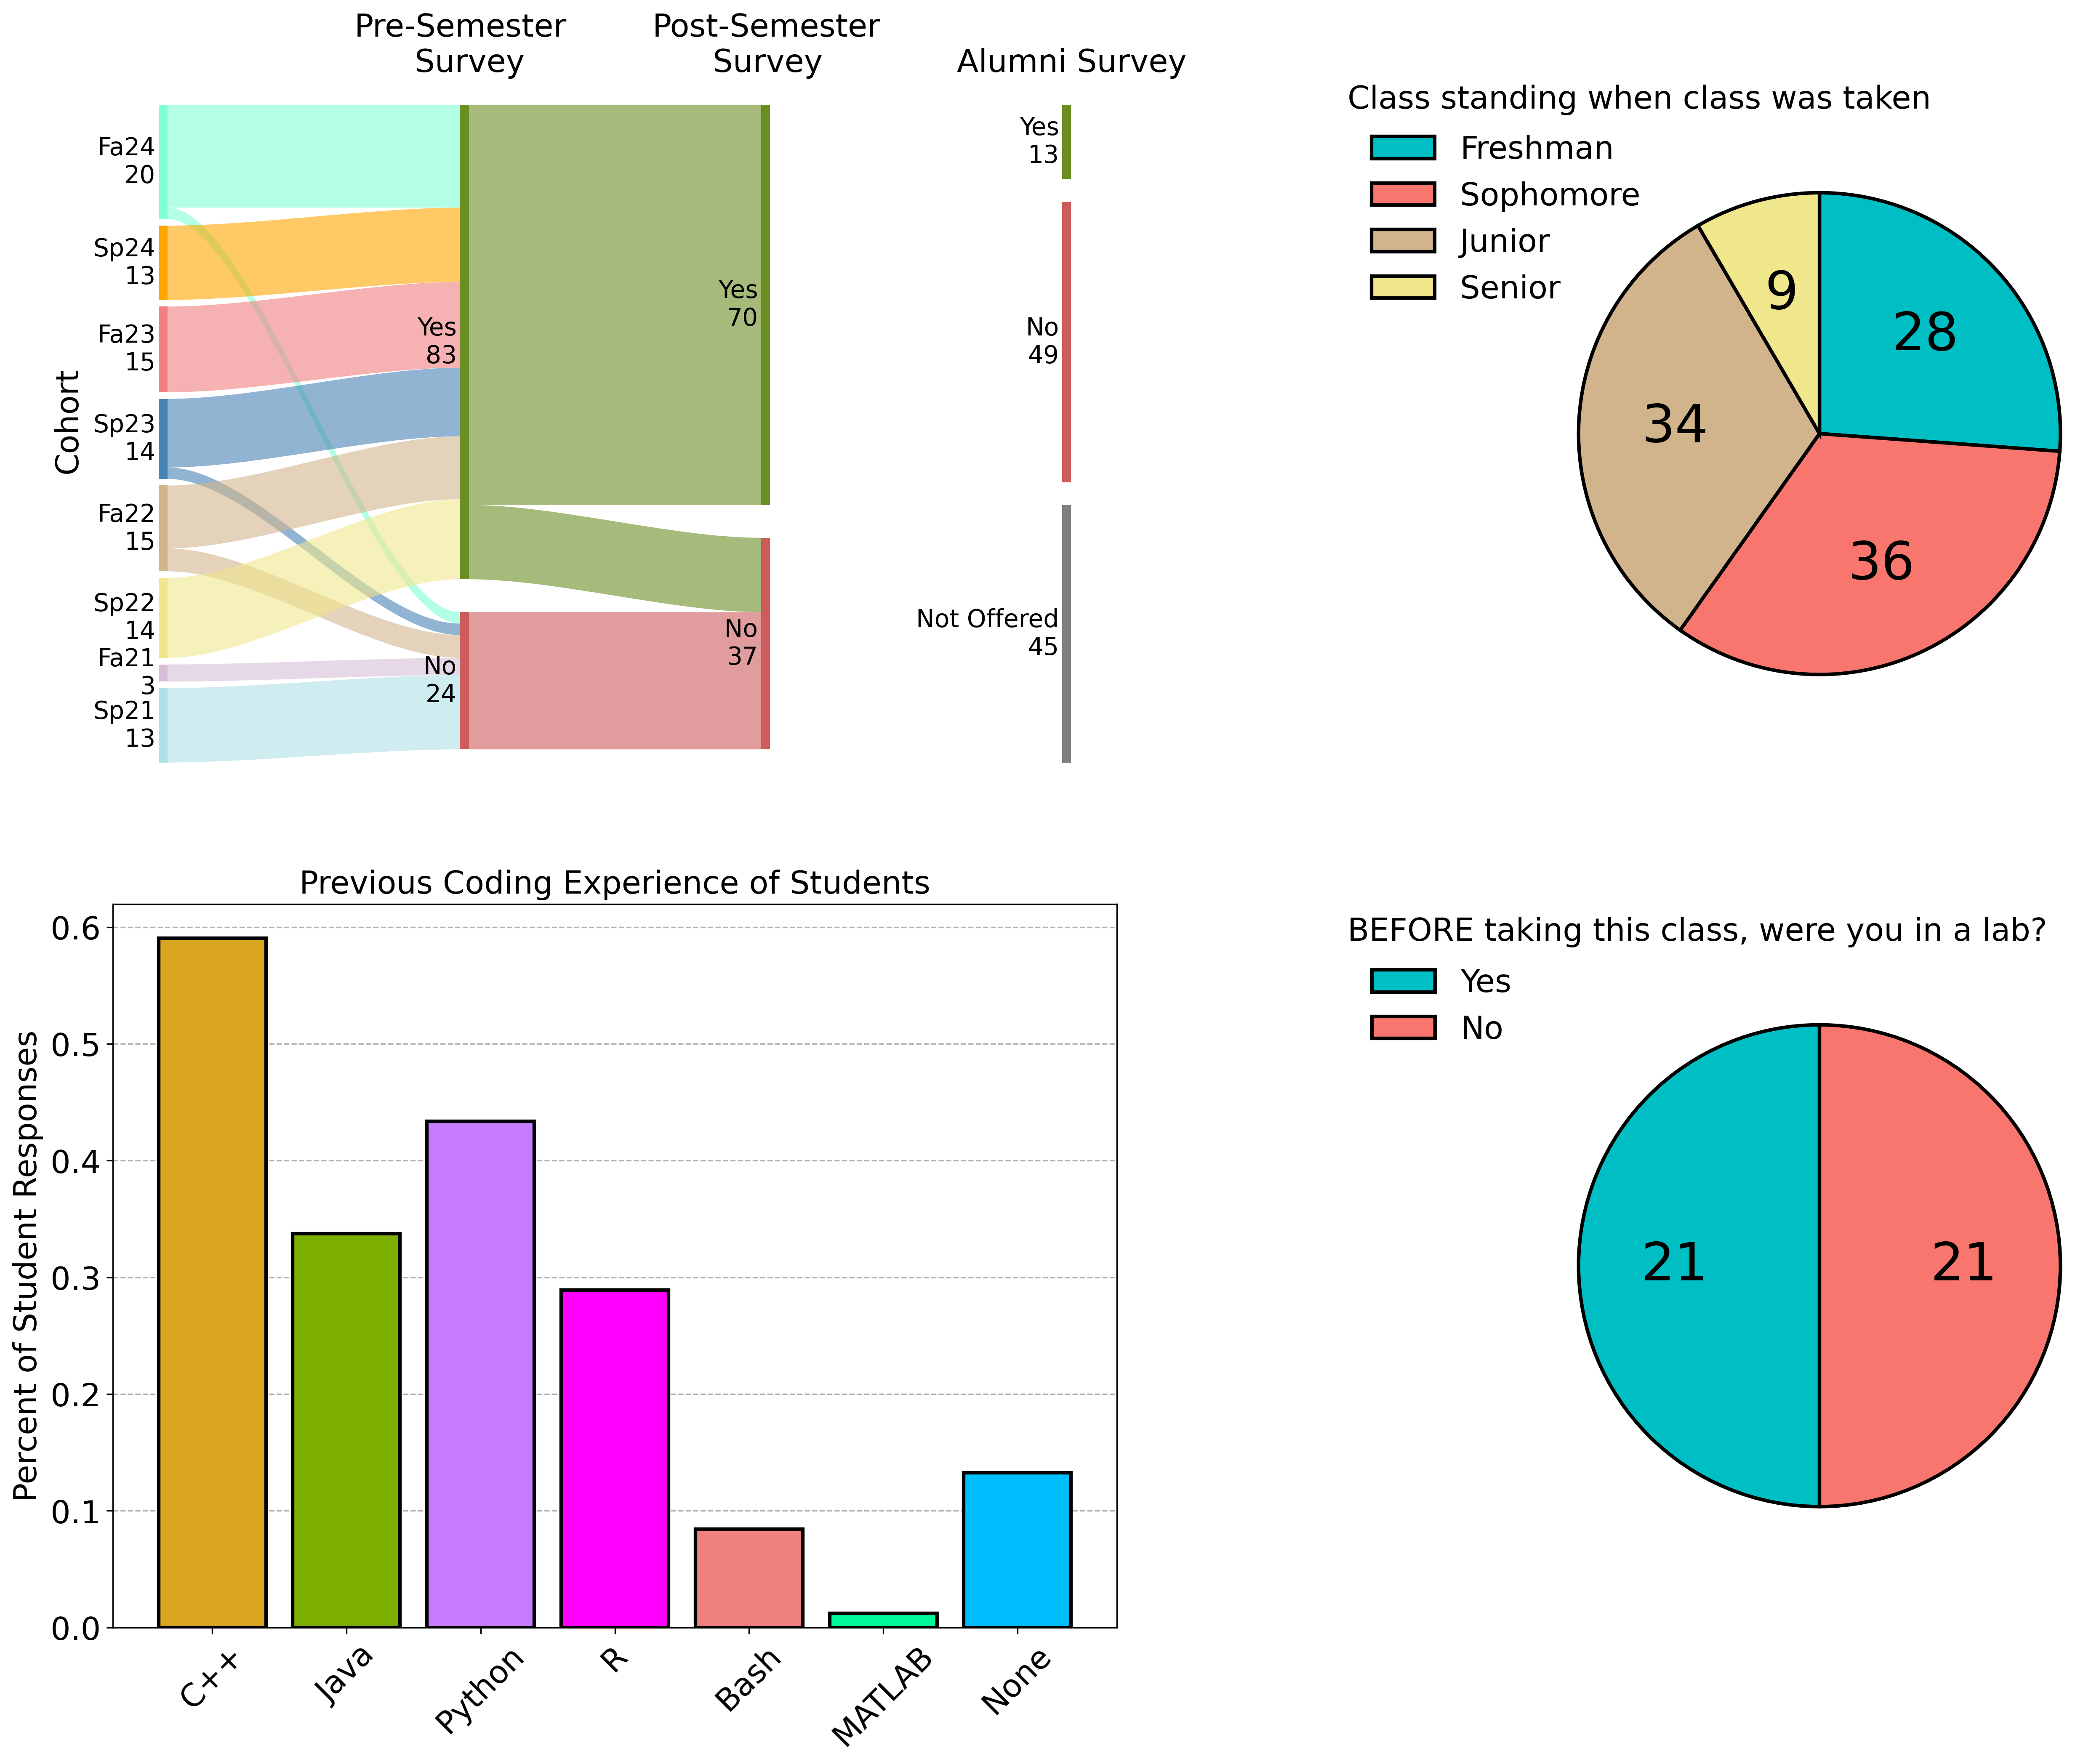

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(20, 16), dpi=300, gridspec_kw={'width_ratios': [2, 1]})
axs = axs.flatten()

num_surveys_offered = 62

plt.rcParams["font.family"] = "sans-serif"
nodes = [
    sem_nodes,    
    [['Yes', yes_total], ['No', whole_counts.sum()-yes_total]],
    [['⠀Yes', post_sem_numbers.sum()], ['⠀No', whole_counts.sum()-post_sem_numbers.sum()]], # include ancillary characters to have multiple duplicate labels
    [['Yes', 13], ['No', num_surveys_offered-13], ['Not Offered', whole_counts.sum()-num_surveys_offered]] # alumni survey offered to Sp21-Sp23, 13 responses
]

s = Sankey(
    flows=flows,
    nodes=nodes,
    cmap=ListedColormap(['aquamarine', 'orange','lightcoral', 'steelblue', 'tan', 'khaki', 'thistle', 'powderblue', 'olivedrab', 'indianred', 'olivedrab', 'indianred', 'olivedrab', 'indianred', 'grey'])
)
s.draw(ax=axs[0])
axs[0].text(-0.35, .45, 'Cohort', fontsize=18, rotation=90)
axs[0].text(0.65, 1.05, 'Pre-Semester\n      Survey', fontsize=18)
axs[0].text(1.64, 1.05, 'Post-Semester\n      Survey', fontsize=18)
axs[0].text(2.65, 1.05, 'Alumni Survey', fontsize=18)



sizes = metadata.Status.value_counts().loc[['Freshman', 'Sophomore', 'Junior', 'Senior']]

class_names=['Freshman', 'Sophomore', 'Junior', 'Senior']

axs[1].pie(sizes,
        colors=['#00BFC4', '#F8766D', 'tan', 'khaki'],
        radius=1.2,
        center=(0.65, 1.05),
       # explode=[0.1, 0.1, 0.1, 0],
        labeldistance=0.5,
        wedgeprops={'edgecolor': 'black', 'linewidth': 2},
        textprops={'fontsize': 30, 'color': 'black'},
        startangle=90,
        autopct=absolute_value,
        counterclock=False)

axs[1].legend(class_names,
           bbox_to_anchor=(0.2, 0.7),
           fontsize=18,
           frameon=False)

axs[1].text(-1.7, 2.67, 'Class standing when class was taken', fontsize=18)

previous_coding_experience_dict={'C++' : 49, 'Java' : 28, 'Python' : 36, 'R' : 24, 'Bash' : 7, 'MATLAB' : 1, 'None': 11}

axs[2].bar(previous_coding_experience_dict.keys(), 
        np.array(list(previous_coding_experience_dict.values()))/83, 
        color=['goldenrod', '#7CAE00', '#C77CFF', 'fuchsia', 'lightcoral', 'mediumspringgreen', 'deepskyblue'],
        edgecolor='black',
        linewidth=2,
        zorder=2)

axs[2].set_xticks(np.arange(len(previous_coding_experience_dict.keys())))
axs[2].set_xticklabels(previous_coding_experience_dict.keys(), rotation=45, fontsize=18)
axs[2].set_yticks(np.linspace(0, 0.6, 7))
axs[2].set_yticklabels(np.round(np.linspace(0, 0.6, 7), 2), fontsize=18)

axs[2].set_ylabel('Percent of Student Responses', fontsize=18)
axs[2].set_title('Previous Coding Experience of Students', fontsize=18)
axs[2].grid(axis='y', linestyle='--',  zorder=1)



lab_info = post_sem.iloc[:, 11].dropna()

sizes = np.array(lab_info.value_counts()[['Yes', 'No']])

axs[3].pie(sizes, 
       # labels=['Yes', 'No'], 
        colors=['#00BFC4', '#F8766D'], 
        radius=1.2, 
        center=(0.65, 1.05), 
        labeldistance=0.5, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 2},
        textprops={'fontsize': 30, 'color': 'black'},
        startangle=90,
        autopct=absolute_value)

axs[3].legend(['Yes', 'No'], 
           bbox_to_anchor=(-0.057, 1.15), 
           fontsize=18, 
           frameon=False)

axs[3].text(-1.7, 2.67, 'BEFORE taking this class, were you in a lab?', fontsize=18)


plt.subplots_adjust(wspace=0.6, hspace=0.15)

# Fig 2

In [24]:

encoding_list=['Command Line / GitHub', 
                'Basic R (i.e. syntax, documentation, etc.)', 
                'Scientific R (i.e. SummarizedExperiments, MAF files, plotting, maftools, DESeq2, etc.)', 
                'Basic Python (i.e. syntax, documentation, etc.)',
                'Scientific Python (i.e. numpy, pandas, matplotlib, seaborn, etc.)',
                'Machine Learning (sklearn, classification, dimensionality reduction, etc.)',
                'Presentation Skills',
                'Reading and Comprehending Scientific Literature'
                ]

na_mask=data.iloc[:, [3,4]].dropna().index
cleaned_df = pd.DataFrame(data.iloc[na_mask, -24:-8].sum().to_numpy().reshape(2, 8).T, index=encoding_list, columns=['Before', 'After'])
cleaned_df=cleaned_df.div(len(na_mask)).iloc[::-1, :]


responses=alumni_survey.iloc[:13, 4]
encoding_dict={0: 'Scientific communication', 1:'Linux/Command line', 2:'R', 3: 'Python', 4:'Machine learning', 5:'Big data analysis'}

response_df=pd.DataFrame(columns=encoding_dict.values())

for x in range(6):
    for y in range(len(responses)):
        if encoding_dict[x] in responses[y]:
            response_df.loc[y, encoding_dict[x]]=1
            
response_df.fillna(0, inplace=True)

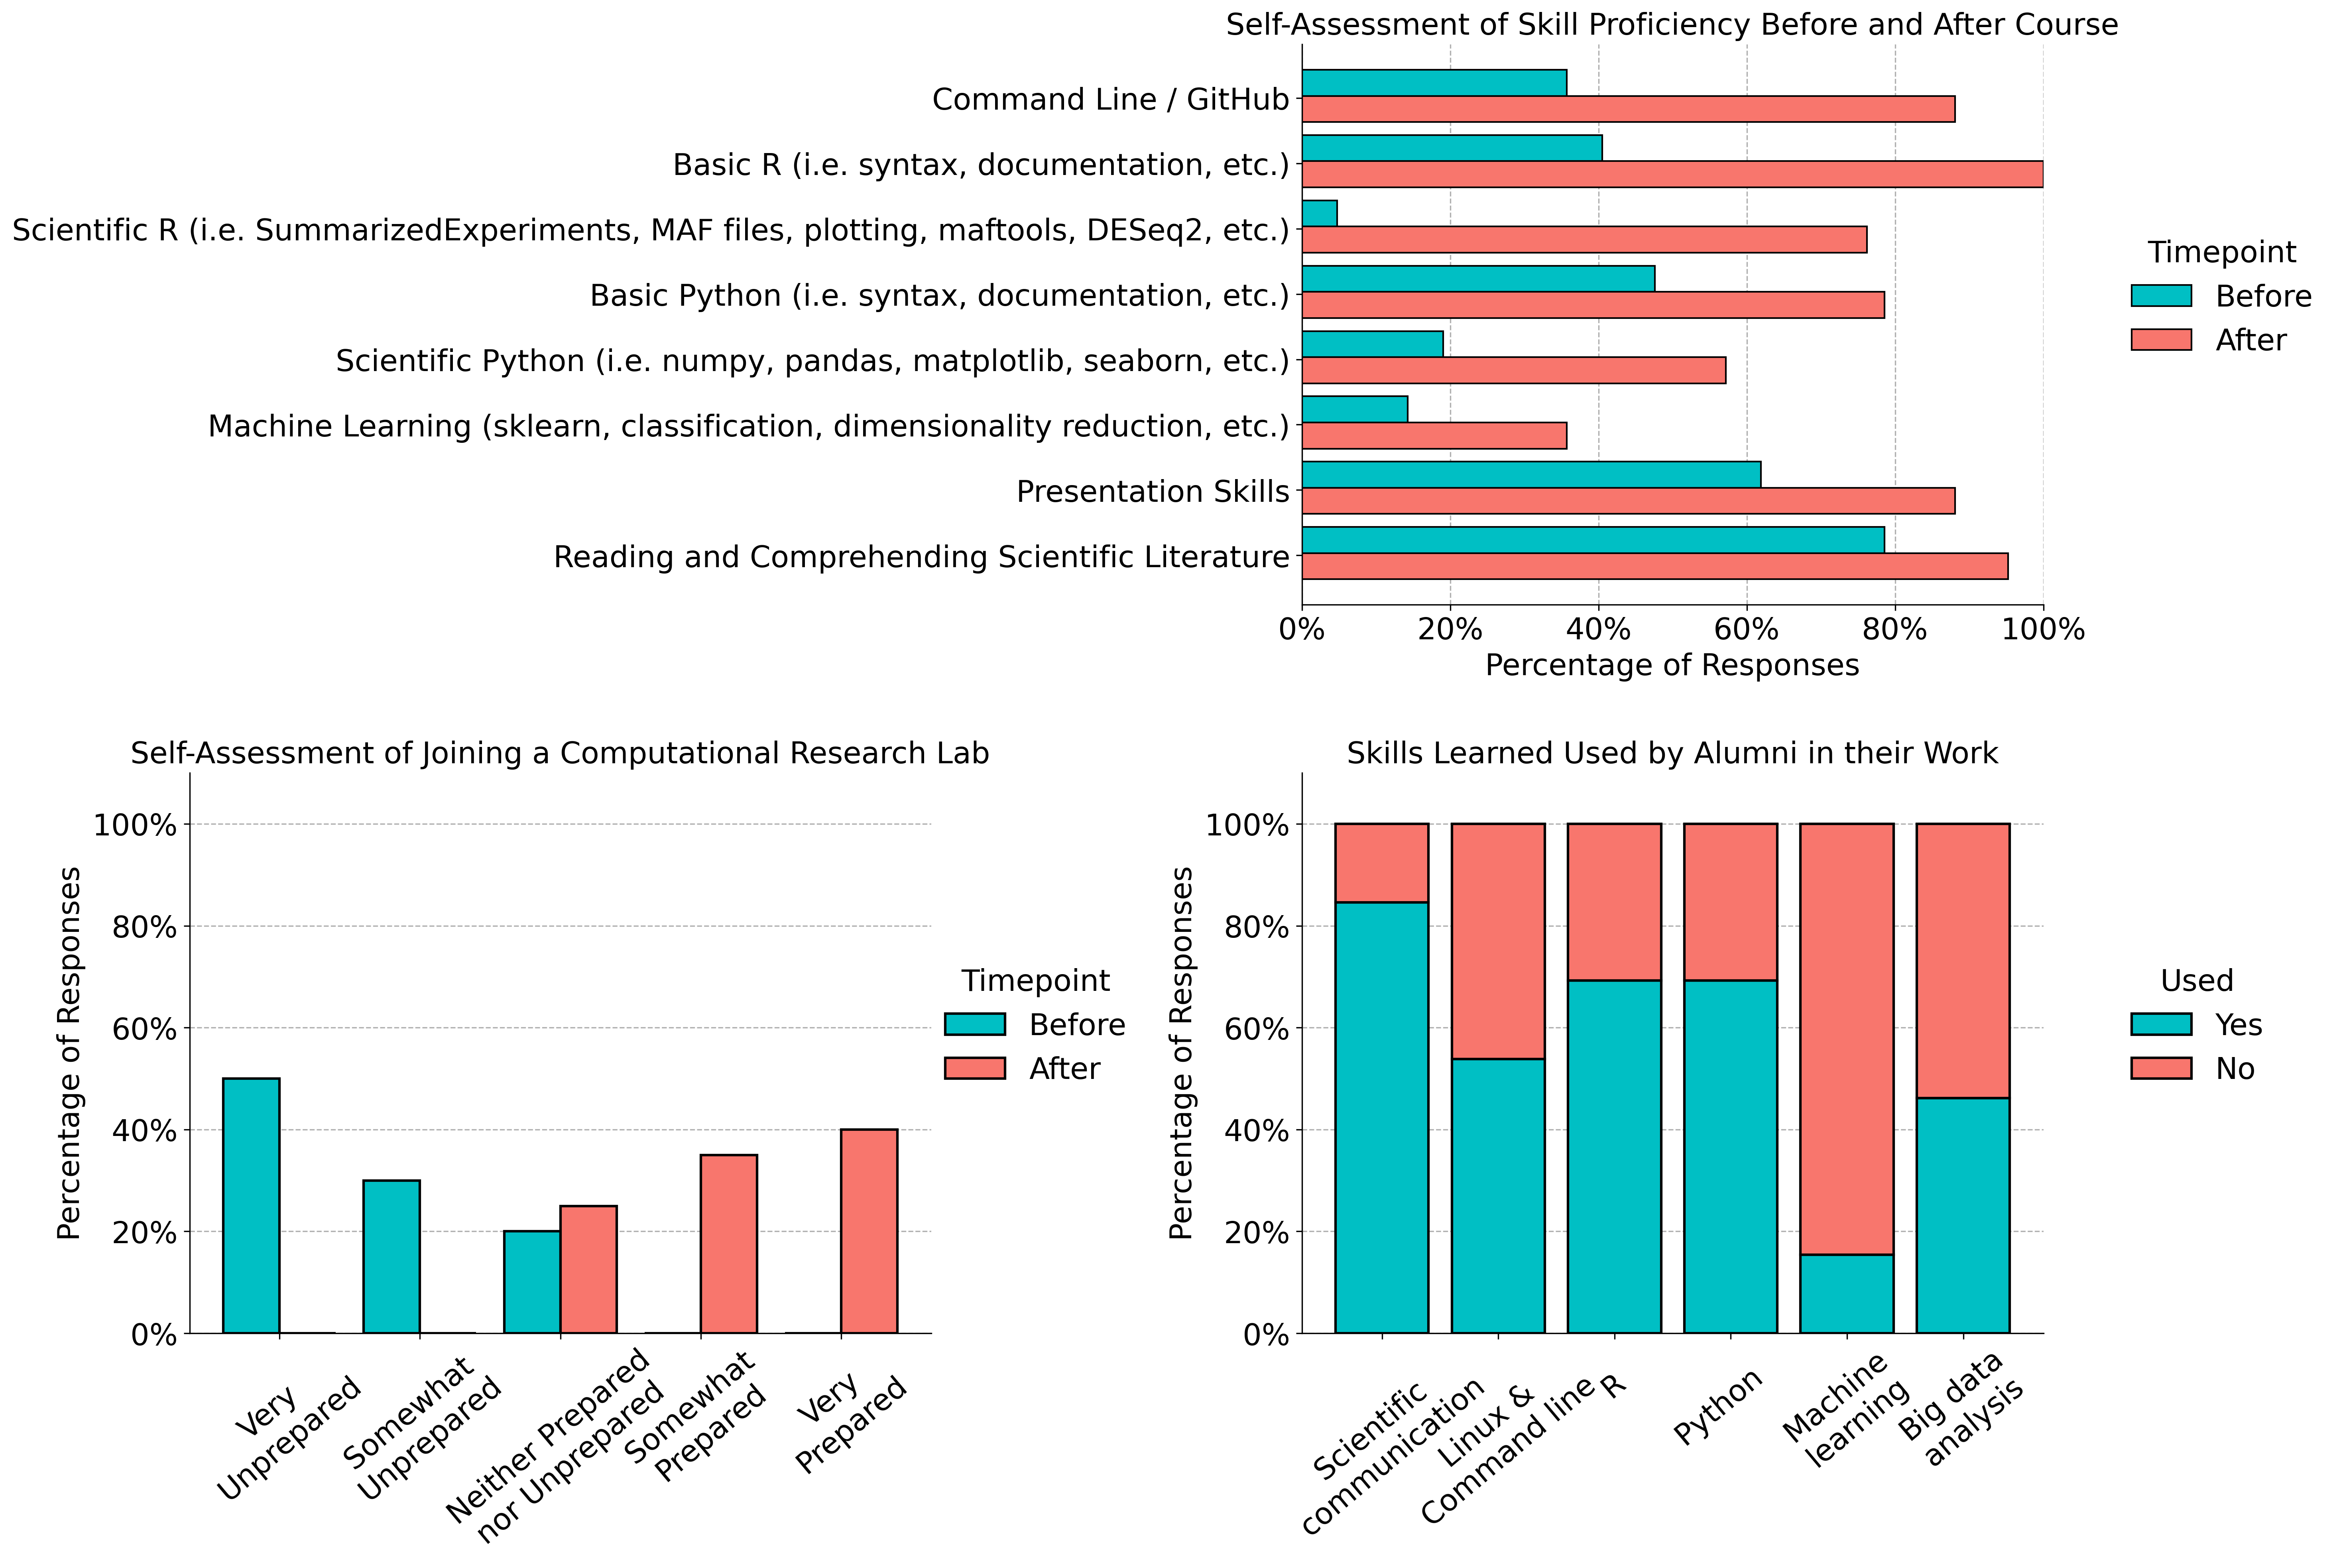

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(20, 14), dpi=300)

axs=axs.flatten()

axs[0].axis('off')
axs[1].barh(np.arange(1.2, len(cleaned_df)*3+1.2, 3), cleaned_df.Before, color='#00BFC4', height=1.2, zorder=2, linewidth=1, edgecolor='black')
axs[1].barh(np.arange(0, len(cleaned_df)*3, 3), cleaned_df.After, color='#F8766D', height=1.2, zorder=2, linewidth=1, edgecolor='black')

axs[1].set_yticks(np.arange(0.5, len(cleaned_df)*3, 3))
axs[1].set_yticklabels(cleaned_df.index, fontsize=18)
axs[1].set_xlabel('Percentage of Responses', fontsize=18)

axs[1].set_xticks(np.arange(0, 1.1, 0.2))
axs[1].set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=18)

axs[1].legend(['Before', 'After'], bbox_to_anchor=(1.4, 0.7), fontsize=18, frameon=False, title='Timepoint', title_fontsize=18)

axs[1].tick_params(axis='x', labelsize=18)

axs[1].set_xlim(0, 1)

axs[1].set_title('Self-Assessment of Skill Proficiency Before and After Course', fontsize=18)
axs[1].grid(axis='x', zorder=1, linestyle='--')
axs[1].spines[['top', 'right']].set_visible(False)


hist_data= data.iloc[:, [-27, -25]].dropna()
weights=np.ones_like(hist_data)/len(hist_data)

axs[2].hist(hist_data, bins=5, color=['#00BFC4', '#F8766D'], label=['Before', 'After'], weights=weights, zorder=2, edgecolor='black', linewidth=1.5, rwidth=0.8)
axs[2].legend(fontsize=18, frameon=False, title='Timepoint', title_fontsize=18, bbox_to_anchor=(1.3, 0.7))
axs[2].set_xticks(np.linspace(1.4,4.6, 5))
axs[2].set_xticklabels(['Very\nUnprepared', 'Somewhat\nUnprepared', 'Neither Prepared\nnor Unprepared', 'Somewhat\nPrepared', 'Very\nPrepared'], fontsize=18, rotation=40)
axs[2].set_yticks(np.arange(0, 1.2, 0.2))
axs[2].set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=18)
axs[2].set_ylabel('Percentage of Responses', fontsize=18)
axs[2].set_title('Self-Assessment of Joining a Computational Research Lab', fontsize=18)
axs[2].grid(axis='y', linestyle='--', zorder=1)
axs[2].spines[['top', 'right']].set_visible(False)
axs[2].set_ylim(0, 1.1)


labels=['Scientific\ncommunication', 'Linux &\nCommand line', '    R    ', 'Python   ', 'Machine\nlearning', 'Big data\nanalysis']

pos_responses=response_df.sum()/len(response_df)
axs[3].bar(labels, pos_responses, color='#00BFC4', label='Yes', linewidth=1.5, edgecolor='black', zorder=2)
axs[3].bar(labels, 1-pos_responses, bottom=pos_responses, color='#F8766D', label='No', linewidth=1.5, edgecolor='black', zorder=2)
plt.xticks(rotation=40, fontsize=18)
plt.yticks(np.arange(0, 1.2, 0.2), ['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=18)
axs[3].set_ylabel('Percentage of Responses', fontsize=18)
axs[3].set_title('Skills Learned Used by Alumni in their Work', fontsize=18)

axs[3].legend(['Yes', 'No'], bbox_to_anchor=(1.333, 0.7), fontsize=18, frameon=False, title='Used', title_fontsize=18)
axs[3].spines[['top', 'right']].set_visible(False)
axs[3].grid(axis='y', linestyle='--', zorder=1)
axs[3].set_ylim(0, 1.1)

plt.subplots_adjust(wspace=0.5, hspace=0.3)

Text(-1, 2.7, 'Would you recommend this course?')

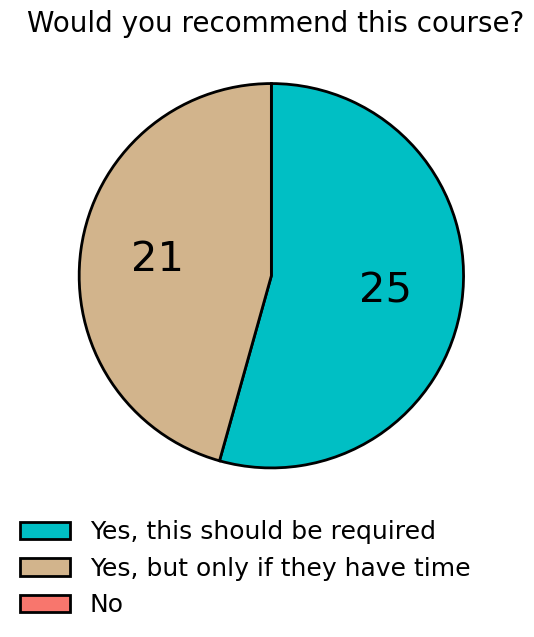

In [105]:
import matplotlib.patches as mpatches

sizes=recommendation_results.iloc[:, 3].value_counts()

answer_choices=['Yes, this should be required', 'Yes, but only if they have time', 'No']

fig, ax = plt.subplots()

ax.pie(sizes,
        colors=['#00BFC4', 'tan', '#F8766D'],
        radius=1.3,
        center=(0.65, 1.05),
       # explode=[0.1, 0.1, 0.1, 0],
        labeldistance=0.5,
        wedgeprops={'edgecolor': 'black', 'linewidth': 2},
        textprops={'fontsize': 30, 'color': 'black'},
        startangle=90,
        autopct=absolute_value,
        counterclock=False)


patches=[mpatches.Patch(facecolor='#00BFC4', label='Yes, this should be required', edgecolor='black', linewidth=2),
         mpatches.Patch(facecolor='tan', label='Yes, but only if they have time', edgecolor='black', linewidth=2),
         mpatches.Patch(facecolor='#F8766D', label='No', edgecolor='black', linewidth=2)]

legend=ax.legend(patches, answer_choices,
           bbox_to_anchor=(1.1, -0.1),
           fontsize=18,
           frameon=False)

ax.text(-1, 2.7, 'Would you recommend this course?', fontsize=20)

Text(-1.6, 3.5, 'Career Goals as of Survey')

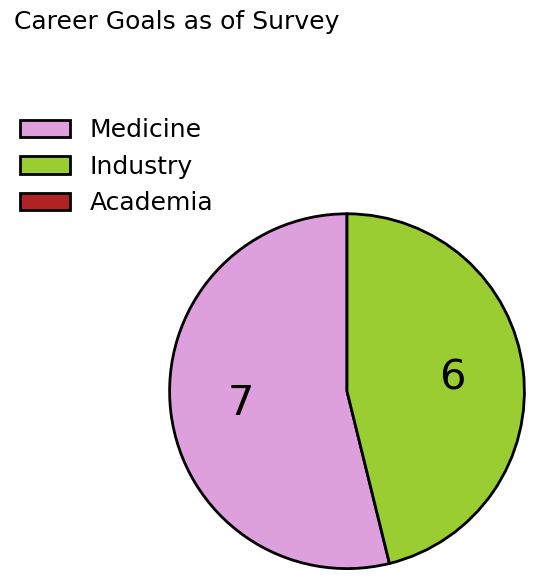

In [ ]:
sizes = alumni_survey.iloc[:13, 3].value_counts().to_numpy()

plt.pie(sizes, 
       # labels=['Yes', 'No'], 
        colors=['plum', 'yellowgreen'], 
        radius=1.2, 
        center=(0.65, 1.05), 
        labeldistance=0.5, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 2},
        textprops={'fontsize': 30, 'color': 'black'},
        startangle=90,
        autopct=absolute_value)

patches=[mpatches.Patch(facecolor='plum', label='Medicine', edgecolor='black', linewidth=2),
         mpatches.Patch(facecolor='yellowgreen', label='Industry', edgecolor='black', linewidth=2),
         mpatches.Patch(facecolor='firebrick', label='Academia', edgecolor='black', linewidth=2)]

plt.legend(patches, list(alumni_survey.iloc[:13, 3].value_counts().index) + ['Academia'], 
           bbox_to_anchor=(0.2, 1.3), 
           fontsize=18, 
           frameon=False)

plt.text(-1.6, 3.5, 'Career Goals as of Survey', fontsize=18)
